<a href="https://colab.research.google.com/github/DDGUZMANO/energia_y_contaminacion/blob/main/TP3/energia_y_contaminacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Energía y Contaminación.

## Montamos nuestra secion de Google Colab en nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ubicamos la carpeta que contiene los datasets a estudiar

In [ ]:
!ls /content/drive/My\ Drive/energia


 air-pollution.csv  'global-data-on-sustainable-energy (1).csv'


## Importación de bibliotecas a usar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## Empezamos con el dataset de contaminación del aire

Este conjunto de datos recopila información sobre la calidad del aire a través del tiempo, específicamente desde 1750 hasta 2022. Contiene registros de emisiones de diversos contaminantes, como óxidos de nitrógeno (NOx), dióxido de azufre (SO2), monóxido de carbono (CO), carbono orgánico (OC), compuestos orgánicos volátiles no metánicos (COVNM), carbono negro (BC) y amoníaco (NH3) en diferentes países del mundo.

In [ ]:
path='/content/drive/My Drive/energia/air-pollution.csv'
air=pd.read_csv(path)
air.head()

,Entity,Code,Year,Nitrogen oxide (NOx),Sulphur dioxide (SO₂) emissions,Carbon monoxide (CO) emissions,Organic carbon (OC) emissions,Non-methane volatile organic compounds (NMVOC) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions,Unnamed: 10
0,Afghanistan,AFG,1750,555.47860,174.87167,142073.31,5456.8850,13596.633,1633.0308,7681.0464,NaN
1,Afghanistan,AFG,1760,578.50757,181.99332,147859.23,5679.1167,14150.870,1699.5359,8000.8574,NaN
2,Afghanistan,AFG,1770,602.47980,189.38850,153867.40,5909.8840,14726.470,1768.5956,8333.9610,NaN
3,Afghanistan,AFG,1780,627.43220,197.06535,160104.42,6149.4410,15324.077,1840.2854,8680.9060,NaN
4,Afghanistan,AFG,1790,653.40310,205.03189,166576.77,6398.0370,15944.332,1914.6805,9042.2660,NaN


### Veamos algunas estadisticas descriptivas

In [ ]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48225 entries, 0 to 48224
Data columns (total 11 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Entity                                                    48225 non-null  object 
 1   Code                                                      45717 non-null  object 
 2   Year                                                      48225 non-null  int64  
 3   Nitrogen oxide (NOx)                                      48225 non-null  float64
 4   Sulphur dioxide (SO₂) emissions                           48225 non-null  float64
 5   Carbon monoxide (CO) emissions                            48225 non-null  float64
 6   Organic carbon (OC) emissions                             48225 non-null  float64
 7   Non-methane volatile organic compounds (NMVOC) emissions  48225 non-null  float64
 8   Black carbon (BC

Podemos observar que el conjunto de datos es homogéneo y carece de valores nulos en la mayoría de sus columnas. Sin embargo, identificamos valores nulos en la columna 'Code', la cual indica el código de país de la entidad de estudio según la norma ISO 3166-1 alfa-3. Dada la naturaleza de nuestro análisis, hemos determinado que esta columna puede ser eliminada sin comprometer los resultados. Asimismo, la columna 'Unnamed: 10' se encuentra completamente vacía, por lo que también será descartada.

In [ ]:
air.describe()

,Year,Nitrogen oxide (NOx),Sulphur dioxide (SO₂) emissions,Carbon monoxide (CO) emissions,Organic carbon (OC) emissions,Non-methane volatile organic compounds (NMVOC) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions,Unnamed: 10
count,48225.000000,4.822500e+04,4.822500e+04,4.822500e+04,4.822500e+04,4.822500e+04,4.822500e+04,4.822500e+04,0.0
mean,1911.032970,5.407779e+05,8.091183e+05,4.885731e+06,1.315203e+05,8.771926e+05,4.738836e+04,3.521420e+05,NaN
std,67.608974,4.408950e+06,5.761058e+06,2.851080e+07,6.740897e+05,5.769500e+06,2.769505e+05,2.326560e+06,NaN
min,1750.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,1854.000000,1.569637e+02,6.362120e+01,1.367615e+04,5.955074e+02,2.313765e+03,1.490397e+02,1.370903e+03,NaN
50%,1913.000000,1.781608e+03,9.523438e+02,1.087148e+05,4.429489e+03,1.770346e+04,1.090644e+03,9.434461e+03,NaN
75%,1970.000000,3.104208e+04,3.370849e+04,6.107858e+05,2.220716e+04,1.132467e+05,6.594997e+03,5.192593e+04,NaN
max,2022.000000,1.092431e+08,1.345966e+08,5.999133e+08,1.361832e+07,1.354817e+08,6.141969e+06,6.394764e+07,NaN


En primera instancia, observamos que nuestro conjunto de datos analiza la evolución de los contaminantes a lo largo de un período de 272 años (1750-2022), evidenciando una diferencia significativa entre los niveles de contaminación iniciales y finales.

### Manejo de valores faltantes

In [ ]:
print(air.isnull().sum())

Entity                                                          0
Code                                                         2508
Year                                                            0
Nitrogen oxide (NOx)                                            0
Sulphur dioxide (SO₂) emissions                                 0
Carbon monoxide (CO) emissions                                  0
Organic carbon (OC) emissions                                   0
Non-methane volatile organic compounds (NMVOC) emissions        0
Black carbon (BC) emissions                                     0
Ammonia (NH₃) emissions                                         0
Unnamed: 10                                                 48225
dtype: int64


Eliminemos las columnas con valores nulos.

In [ ]:
air = air.drop(columns=['Unnamed: 10', 'Code'])

Comprobamos

In [ ]:
air.head()

,Entity,Year,Nitrogen oxide (NOx),Sulphur dioxide (SO₂) emissions,Carbon monoxide (CO) emissions,Organic carbon (OC) emissions,Non-methane volatile organic compounds (NMVOC) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions
0,Afghanistan,1750,555.47860,174.87167,142073.31,5456.8850,13596.633,1633.0308,7681.0464
1,Afghanistan,1760,578.50757,181.99332,147859.23,5679.1167,14150.870,1699.5359,8000.8574
2,Afghanistan,1770,602.47980,189.38850,153867.40,5909.8840,14726.470,1768.5956,8333.9610
3,Afghanistan,1780,627.43220,197.06535,160104.42,6149.4410,15324.077,1840.2854,8680.9060
4,Afghanistan,1790,653.40310,205.03189,166576.77,6398.0370,15944.332,1914.6805,9042.2660


In [ ]:
print(air.isnull().sum())

Entity                                                      0
Year                                                        0
Nitrogen oxide (NOx)                                        0
Sulphur dioxide (SO₂) emissions                             0
Carbon monoxide (CO) emissions                              0
Organic carbon (OC) emissions                               0
Non-methane volatile organic compounds (NMVOC) emissions    0
Black carbon (BC) emissions                                 0
Ammonia (NH₃) emissions                                     0
dtype: int64


Ya sin valores nulos podemos mostrar los datos gráficamente.

### Gráficas

Vamos a preparar un diccionario donde asignaremos a cada uno de los paises que conforman el dataset, su correspondiente continente.

In [ ]:
continent_mapping = {
    'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria': 'Africa', 'American Samoa': 'Oceania', 'Angola': 'Africa',
    'Antigua and Barbuda': 'North America', 'Argentina': 'South America', 'Armenia': 'Asia', 'Aruba': 'North America',
    'Australia': 'Oceania', 'Austria': 'Europe', 'Azerbaijan': 'Asia', 'Bahamas': 'North America', 'Bahrain': 'Asia',
    'Bangladesh': 'Asia', 'Barbados': 'North America', 'Belarus': 'Europe', 'Belgium': 'Europe', 'Belize': 'North America',
    'Benin': 'Africa', 'Bermuda': 'North America', 'Bhutan': 'Asia', 'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe', 'Botswana': 'Africa', 'Brazil': 'South America',
    'British Virgin Islands': 'North America', 'Brunei': 'Asia', 'Bulgaria': 'Europe', 'Burkina Faso': 'Africa',
    'Burundi': 'Africa', 'Cambodia': 'Asia', 'Cameroon': 'Africa', 'Canada': 'North America', 'Cape Verde': 'Africa',
    'Cayman Islands': 'North America', 'Central African Republic': 'Africa', 'Chad': 'Africa', 'Chile': 'South America',
    'China': 'Asia', 'Colombia': 'South America', 'Comoros': 'Africa', 'Congo': 'Africa', 'Cook Islands': 'Oceania',
    'Costa Rica': 'North America', "Cote d'Ivoire": 'Africa', 'Croatia': 'Europe', 'Cuba': 'North America', 'Curacao': 'North America',
    'Cyprus': 'Asia', 'Czechia': 'Europe', 'Democratic Republic of Congo': 'Africa', 'Denmark': 'Europe',
    'Djibouti': 'Africa', 'Dominica': 'North America', 'Dominican Republic': 'North America', 'Ecuador': 'South America',
    'Egypt': 'Africa', 'El Salvador': 'North America', 'Equatorial Guinea': 'Africa', 'Eritrea': 'Africa', 'Estonia': 'Europe',
    'Eswatini': 'Africa', 'Ethiopia': 'Africa', 'Falkland Islands': 'South America', 'Faroe Islands': 'Europe', 'Fiji': 'Oceania',
    'Finland': 'Europe', 'France': 'Europe', 'French Guiana': 'South America', 'French Polynesia': 'Oceania', 'Gabon': 'Africa',
    'Gambia': 'Africa', 'Georgia': 'Asia', 'Germany': 'Europe', 'Ghana': 'Africa', 'Gibraltar': 'Europe', 'Greece': 'Europe',
    'Greenland': 'North America', 'Grenada': 'North America', 'Guadeloupe': 'North America', 'Guam': 'Oceania',
    'Guatemala': 'North America', 'Guinea': 'Africa', 'Guinea-Bissau': 'Africa', 'Guyana': 'South America', 'Haiti': 'North America',
    'Honduras': 'North America', 'Hong Kong': 'Asia', 'Hungary': 'Europe', 'Iceland': 'Europe', 'India': 'Asia', 'Indonesia': 'Asia',
    'Iran': 'Asia', 'Iraq': 'Asia', 'Ireland': 'Europe', 'Israel': 'Asia', 'Italy': 'Europe', 'Jamaica': 'North America',
    'Japan': 'Asia', 'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kenya': 'Africa', 'Kiribati': 'Oceania', 'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia', 'Laos': 'Asia', 'Latvia': 'Europe', 'Lebanon': 'Asia', 'Lesotho': 'Africa', 'Liberia': 'Africa',
    'Libya': 'Africa', 'Liechtenstein': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe', 'Macao': 'Asia',
    'Madagascar': 'Africa', 'Malawi': 'Africa', 'Malaysia': 'Asia', 'Maldives': 'Asia', 'Mali': 'Africa', 'Malta': 'Europe',
    'Marshall Islands': 'Oceania', 'Martinique': 'North America', 'Mauritania': 'Africa', 'Mauritius': 'Africa', 'Mexico': 'North America',
    'Micronesia (country)': 'Oceania', 'Moldova': 'Europe', 'Mongolia': 'Asia', 'Montenegro': 'Europe', 'Montserrat': 'North America',
    'Morocco': 'Africa', 'Mozambique': 'Africa', 'Myanmar': 'Asia', 'Namibia': 'Africa', 'Nepal': 'Asia', 'Netherlands': 'Europe',
    'New Caledonia': 'Oceania', 'New Zealand': 'Oceania', 'Nicaragua': 'North America', 'Niger': 'Africa', 'Nigeria': 'Africa',
    'Niue': 'Oceania', 'North Korea': 'Asia', 'North Macedonia': 'Europe', 'Norway': 'Europe', 'Oman': 'Asia', 'Pakistan': 'Asia',
    'Palau': 'Oceania', 'Panama': 'North America', 'Papua New Guinea': 'Oceania', 'Paraguay': 'South America', 'Peru': 'South America',
    'Philippines': 'Asia', 'Poland': 'Europe', 'Portugal': 'Europe', 'Puerto Rico': 'North America', 'Qatar': 'Asia', 'Reunion': 'Africa',
    'Romania': 'Europe', 'Russia': 'Europe', 'Rwanda': 'Africa', 'Saint Kitts and Nevis': 'North America', 'Saint Lucia': 'North America',
    'Saint Pierre and Miquelon': 'North America', 'Saint Vincent and the Grenadines': 'North America', 'Samoa': 'Oceania',
    'Sao Tome and Principe': 'Africa', 'Saudi Arabia': 'Asia', 'Senegal': 'Africa', 'Serbia': 'Europe', 'Seychelles': 'Africa',
    'Sierra Leone': 'Africa', 'Singapore': 'Asia', 'Sint Maarten (Dutch part)': 'North America', 'Slovakia': 'Europe', 'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania', 'Somalia': 'Africa', 'South Africa': 'Africa', 'South Korea': 'Asia', 'South Sudan': 'Africa',
    'Spain': 'Europe', 'Sri Lanka': 'Asia', 'Sudan': 'Africa', 'Suriname': 'South America', 'Sweden': 'Europe', 'Switzerland': 'Europe',
    'Syria': 'Asia', 'Taiwan': 'Asia', 'Tajikistan': 'Asia', 'Tanzania': 'Africa', 'Thailand': 'Asia', 'Timor': 'Asia', 'Togo': 'Africa',
    'Tokelau': 'Oceania', 'Tonga': 'Oceania', 'Trinidad and Tobago': 'North America', 'Tunisia': 'Africa', 'Turkey': 'Asia',
    'Turkmenistan': 'Asia', 'Turks and Caicos Islands': 'North America', 'Uganda': 'Africa', 'Ukraine': 'Europe', 'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe', 'United States': 'North America', 'Uruguay': 'South America', 'Uzbekistan': 'Asia', 'Vanuatu': 'Oceania',
    'Venezuela': 'South America', 'Vietnam': 'Asia', 'Wallis and Futuna': 'Oceania', 'Yemen': 'Asia', 'Zambia': 'Africa', 'Zimbabwe': 'Africa'
}

Agregamos al dataset una columna que muestre el continente del país

In [ ]:
air['Continent'] = air['Entity'].map(continent_mapping)

air.head()

,Entity,Year,Nitrogen oxide (NOx),Sulphur dioxide (SO₂) emissions,Carbon monoxide (CO) emissions,Organic carbon (OC) emissions,Non-methane volatile organic compounds (NMVOC) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions,Continent
0,Afghanistan,1750,555.47860,174.87167,142073.31,5456.8850,13596.633,1633.0308,7681.0464,Asia
1,Afghanistan,1760,578.50757,181.99332,147859.23,5679.1167,14150.870,1699.5359,8000.8574,Asia
2,Afghanistan,1770,602.47980,189.38850,153867.40,5909.8840,14726.470,1768.5956,8333.9610,Asia
3,Afghanistan,1780,627.43220,197.06535,160104.42,6149.4410,15324.077,1840.2854,8680.9060,Asia
4,Afghanistan,1790,653.40310,205.03189,166576.77,6398.0370,15944.332,1914.6805,9042.2660,Asia


In [ ]:
print(air.isnull().sum())

Entity                                                         0
Year                                                           0
Nitrogen oxide (NOx)                                           0
Sulphur dioxide (SO₂) emissions                                0
Carbon monoxide (CO) emissions                                 0
Organic carbon (OC) emissions                                  0
Non-methane volatile organic compounds (NMVOC) emissions       0
Black carbon (BC) emissions                                    0
Ammonia (NH₃) emissions                                        0
Continent                                                   2694
dtype: int64


De donde salieron estos valores nulos en la columna 'Continent'?

In [ ]:
df_entidades = air[air['Continent'].isna()]

print(df_entidades['Entity'].unique())

['Africa' 'Asia' 'Europe' 'High-income countries' 'Low-income countries'
 'Lower-middle-income countries' 'North America' 'Oceania' 'South America'
 'United States Virgin Islands' 'Upper-middle-income countries'
 'Western Sahara' 'World']


Podemos observar que los registros que contienen valores nulos en la columna 'Continente' no corresponden a un continente específico. Por el contrario, representan un continente o una agrupación de países basada en criterios económicos.

Vamos separar df_entidades de air, formando dos datasets distintos.

In [ ]:
df_entidades.head()

,Entity,Year,Nitrogen oxide (NOx),Sulphur dioxide (SO₂) emissions,Carbon monoxide (CO) emissions,Organic carbon (OC) emissions,Non-methane volatile organic compounds (NMVOC) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions,Continent
228,Africa,1750,17671.812,7693.8726,3283140.0,174831.50,420443.03,47376.312,294775.34,NaN
229,Africa,1760,17750.662,7700.5747,3288960.8,175004.75,420842.38,47419.586,295370.38,NaN
230,Africa,1770,17836.184,7709.6570,3295845.2,175232.31,421382.25,47477.630,296091.75,NaN
231,Africa,1780,17928.623,7721.0396,3303775.8,175512.27,422058.16,47549.906,296939.34,NaN
232,Africa,1790,18028.533,7734.8390,3312819.8,175845.30,422879.56,47636.790,297921.56,NaN


In [ ]:
df_entidades.drop(columns='Continent',inplace=True)

<ipython-input-24-b8a498ad7e41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entidades.drop(columns='Continent',inplace=True)


In [ ]:
df_entidades.head()

,Entity,Year,Nitrogen oxide (NOx),Sulphur dioxide (SO₂) emissions,Carbon monoxide (CO) emissions,Organic carbon (OC) emissions,Non-methane volatile organic compounds (NMVOC) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions
228,Africa,1750,17671.812,7693.8726,3283140.0,174831.50,420443.03,47376.312,294775.34
229,Africa,1760,17750.662,7700.5747,3288960.8,175004.75,420842.38,47419.586,295370.38
230,Africa,1770,17836.184,7709.6570,3295845.2,175232.31,421382.25,47477.630,296091.75
231,Africa,1780,17928.623,7721.0396,3303775.8,175512.27,422058.16,47549.906,296939.34
232,Africa,1790,18028.533,7734.8390,3312819.8,175845.30,422879.56,47636.790,297921.56


In [ ]:
air.dropna(subset=['Continent'],inplace=True)
print(air.isnull().sum())

Entity                                                      0
Year                                                        0
Nitrogen oxide (NOx)                                        0
Sulphur dioxide (SO₂) emissions                             0
Carbon monoxide (CO) emissions                              0
Organic carbon (OC) emissions                               0
Non-methane volatile organic compounds (NMVOC) emissions    0
Black carbon (BC) emissions                                 0
Ammonia (NH₃) emissions                                     0
Continent                                                   0
dtype: int64


#### Grafico de contaminantes a traves de los años.

In [ ]:
contaminantes = air.columns.difference(['Year', 'Entity', 'Continent'])
print(contaminantes)

Index(['Ammonia (NH₃) emissions', 'Black carbon (BC) emissions',
       'Carbon monoxide (CO) emissions', 'Nitrogen oxide (NOx)',
       'Non-methane volatile organic compounds (NMVOC) emissions',
       'Organic carbon (OC) emissions', 'Sulphur dioxide (SO₂) emissions'],
      dtype='object')


Agrupamos por año y obtenemos la sumatoria de cada uno de los contaminantes por año.

In [ ]:
suma_contaminantes_por_año = air.groupby('Year')[contaminantes].sum().reset_index()

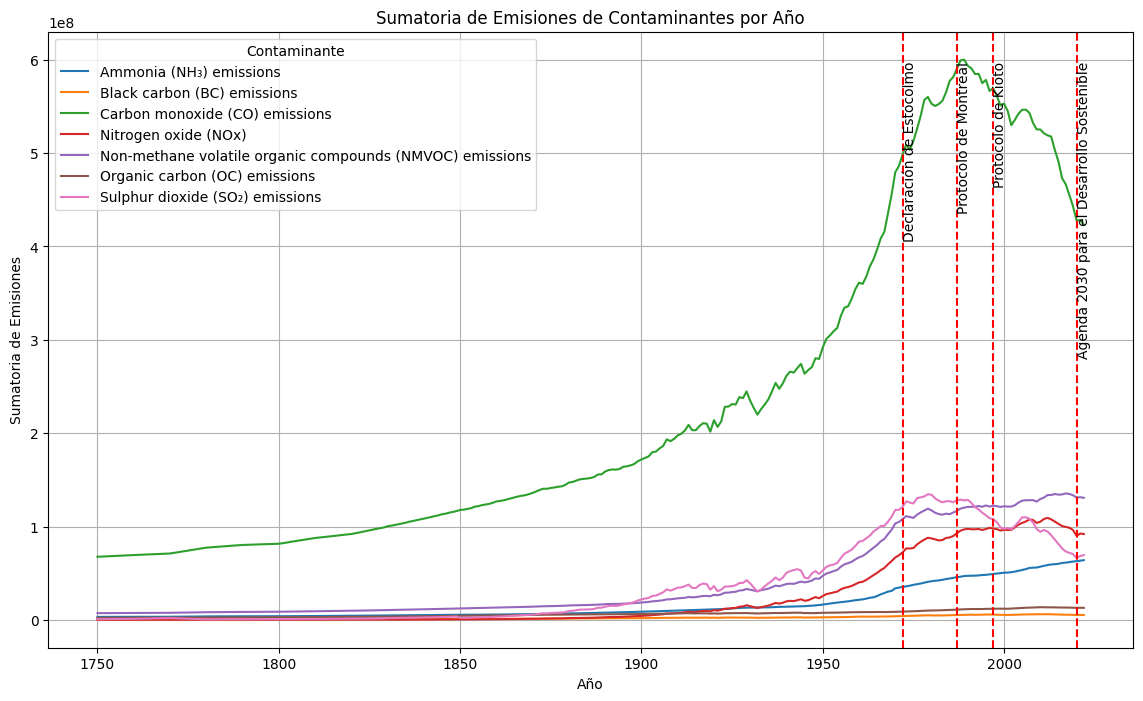

In [ ]:
plt.figure(figsize=(14, 8))

for contaminante in contaminantes:
    sns.lineplot(data=suma_contaminantes_por_año, x='Year', y=contaminante, label=contaminante)

eventos = {
    1972: 'Declaración de Estocolmo',
    1987: 'Protocolo de Montreal',
    1997: 'Protocolo de Kioto',
    2020: 'Agenda 2030 para el Desarrollo Sostenible'
}

for year, evento in eventos.items():
    plt.axvline(x=year, color='red', linestyle='--')
    plt.text(year, plt.ylim()[1]*0.95, evento, rotation=90, verticalalignment='top')

plt.title('Sumatoria de Emisiones de Contaminantes por Año')
plt.xlabel('Año')
plt.ylabel('Sumatoria de Emisiones')
plt.legend(title='Contaminante')
plt.grid(True)
plt.show()

#### Graficos de paises mas contaminantes.

Calcularmos el promedio de emisiones por país

In [ ]:
promedio_emisiones_por_pais = air.groupby('Entity')[contaminantes].mean().reset_index()

Calculamos la sumatoria total de contaminantes por país para seleccionar los más contaminantes

In [ ]:
promedio_emisiones_por_pais['Total_Emisiones'] = promedio_emisiones_por_pais[contaminantes].sum(axis=1)
promedio_emisiones_por_pais.head()

,Entity,Ammonia (NH₃) emissions,Black carbon (BC) emissions,Carbon monoxide (CO) emissions,Nitrogen oxide (NOx),Non-methane volatile organic compounds (NMVOC) emissions,Organic carbon (OC) emissions,Sulphur dioxide (SO₂) emissions,Total_Emisiones
0,Afghanistan,42210.317159,4373.515639,374360.477325,69383.597261,78180.721439,14474.336135,3462.164504,586445.129460
1,Albania,12226.588412,638.257069,102376.174654,6935.859796,16781.553511,4806.402801,12061.844536,155826.680779
2,Algeria,28787.469704,15754.664167,420441.751732,69204.423895,230860.730368,27000.652014,17394.828374,809444.520255
3,American Samoa,107.332095,8.182787,772.259020,274.830731,140.464600,21.313674,710.660730,2035.043638
4,Angola,35865.704388,7367.140871,482576.712500,17140.537234,143026.963303,23398.946127,7181.416573,716557.420996


Seleccionamos los 10 países más contaminantes a nivel global

In [ ]:
top_10_paises_global = promedio_emisiones_por_pais.nlargest(10, 'Total_Emisiones')
top_10_paises_global.head()

,Entity,Ammonia (NH₃) emissions,Black carbon (BC) emissions,Carbon monoxide (CO) emissions,Nitrogen oxide (NOx),Non-methane volatile organic compounds (NMVOC) emissions,Organic carbon (OC) emissions,Sulphur dioxide (SO₂) emissions,Total_Emisiones
207,United States,1.491332e+06,307016.551004,5.522749e+07,7.511777e+06,9.224261e+06,9.524365e+05,9.626677e+06,8.434099e+07
39,China,4.122953e+06,540223.603333,6.203323e+07,3.662060e+06,7.431029e+06,1.042381e+06,4.803836e+06,8.363571e+07
91,India,2.343952e+06,286716.972741,1.884261e+07,1.303766e+06,3.114111e+06,8.839487e+05,1.310759e+06,2.808587e+07
161,Russia,9.430094e+05,115647.567759,1.057667e+07,1.692097e+06,2.170754e+06,4.824786e+05,2.798973e+06,1.877963e+07
206,United Kingdom,1.768899e+05,110947.333579,6.827882e+06,9.083067e+05,8.872636e+05,1.572250e+05,3.025578e+06,1.209409e+07


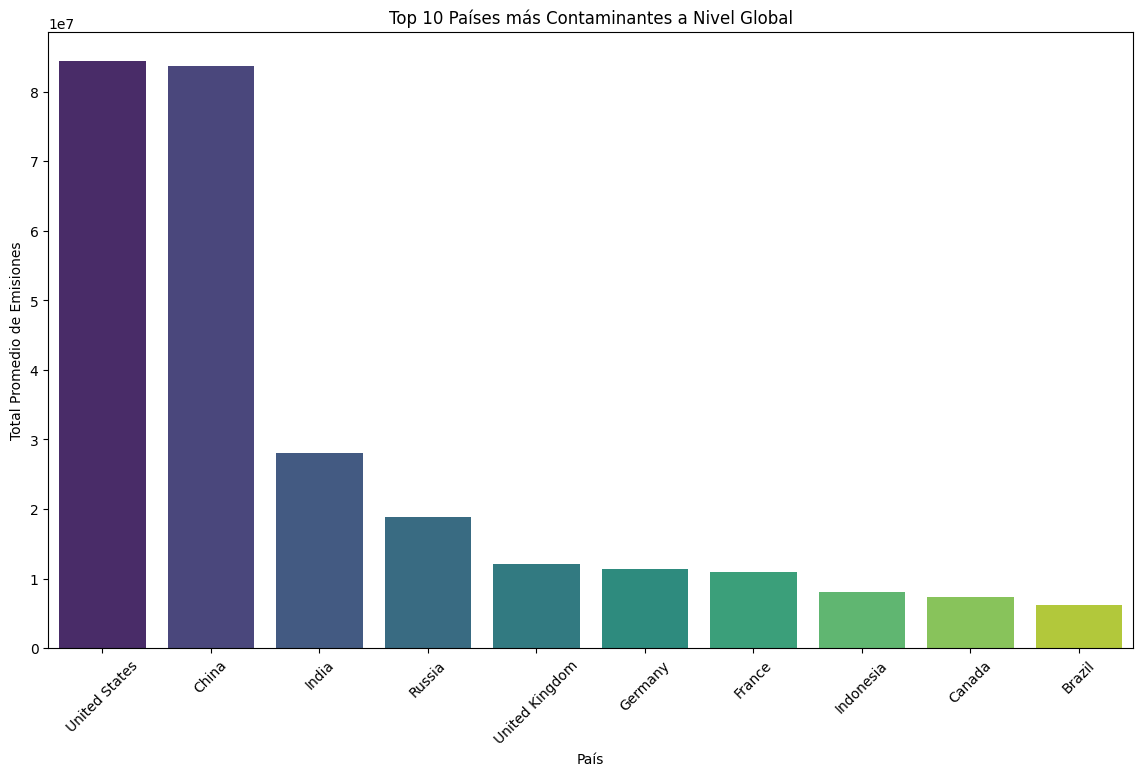

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_paises_global, x='Entity', y='Total_Emisiones', palette='viridis')
plt.title('Top 10 Países más Contaminantes a Nivel Global')
plt.xlabel('País')
plt.ylabel('Total Promedio de Emisiones')
plt.xticks(rotation=45)
plt.show()

Calcular el promedio de emisiones por país y continente

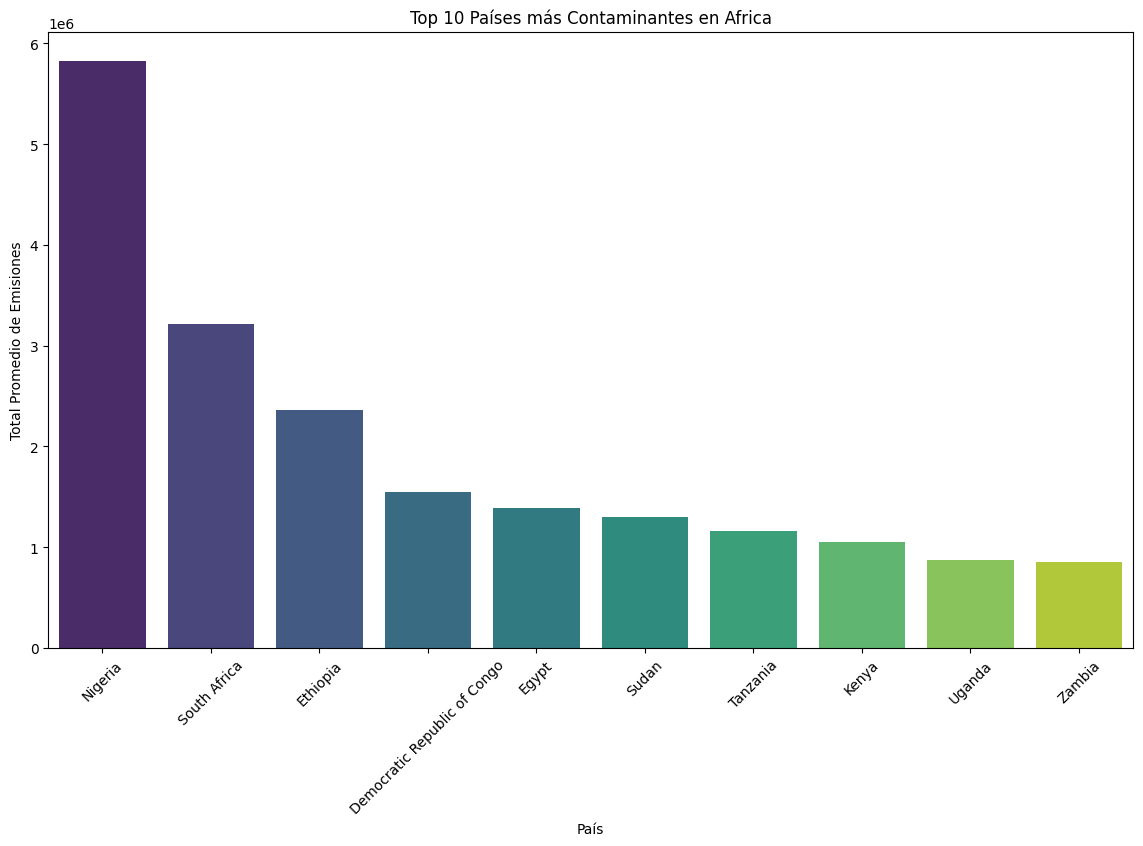

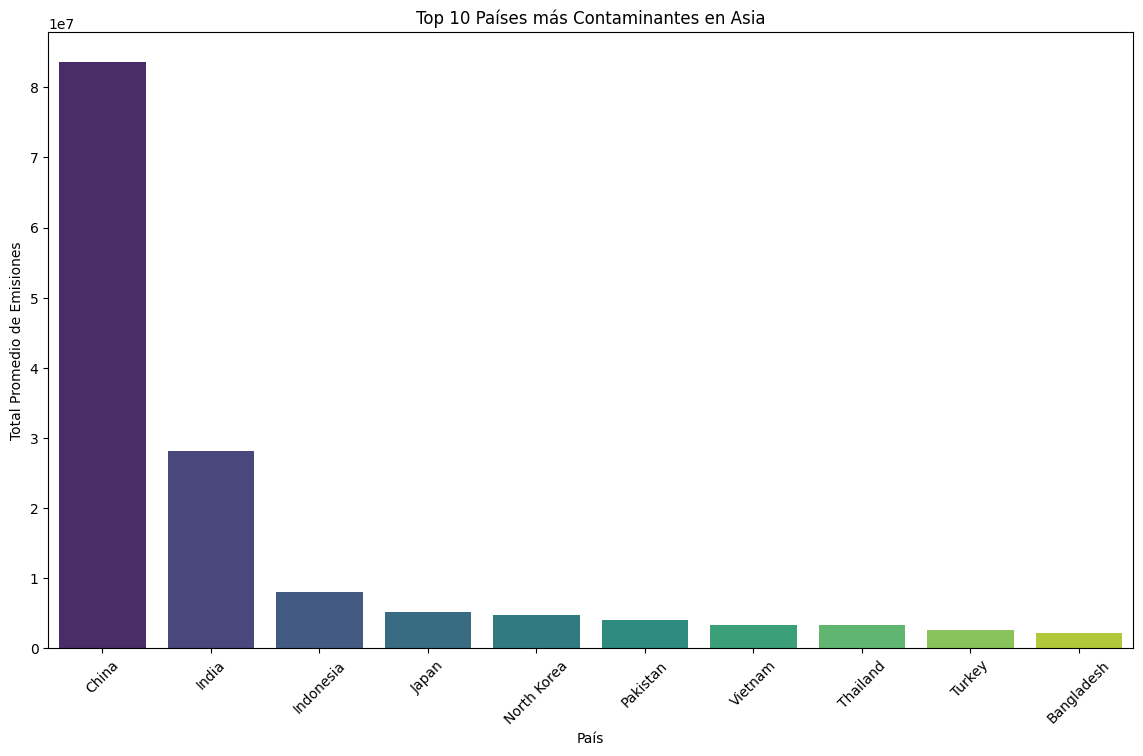

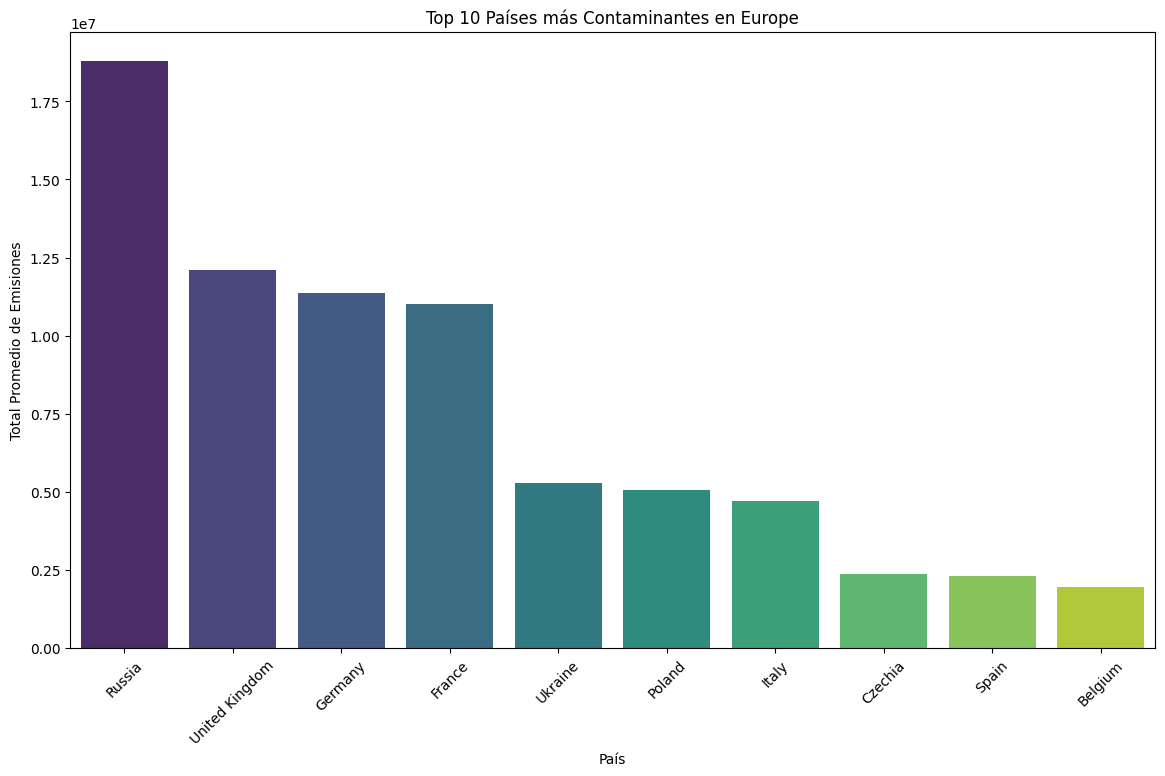

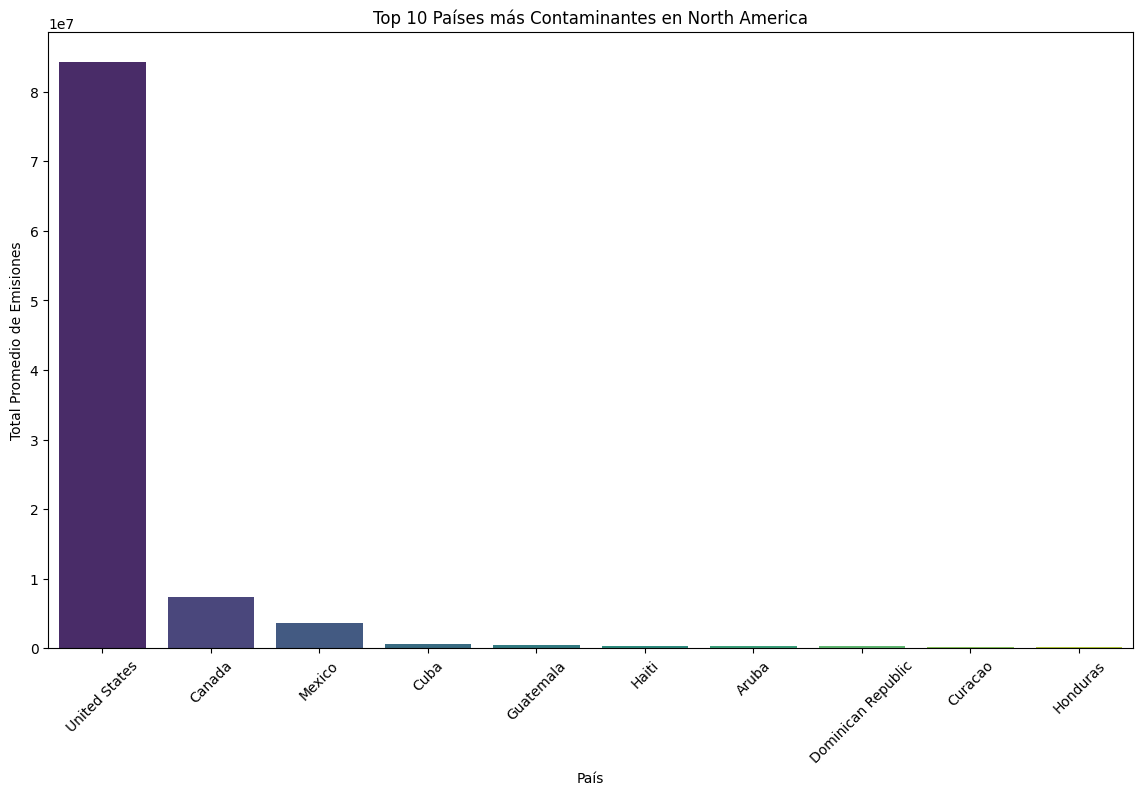

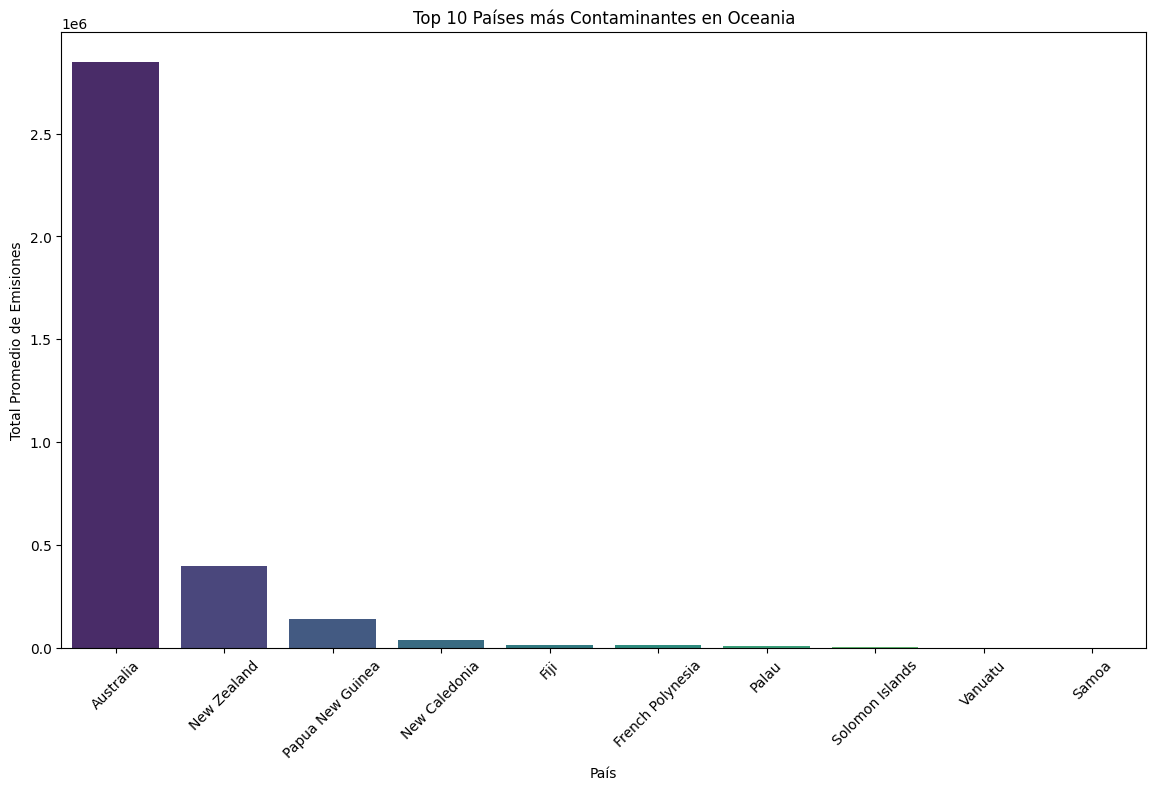

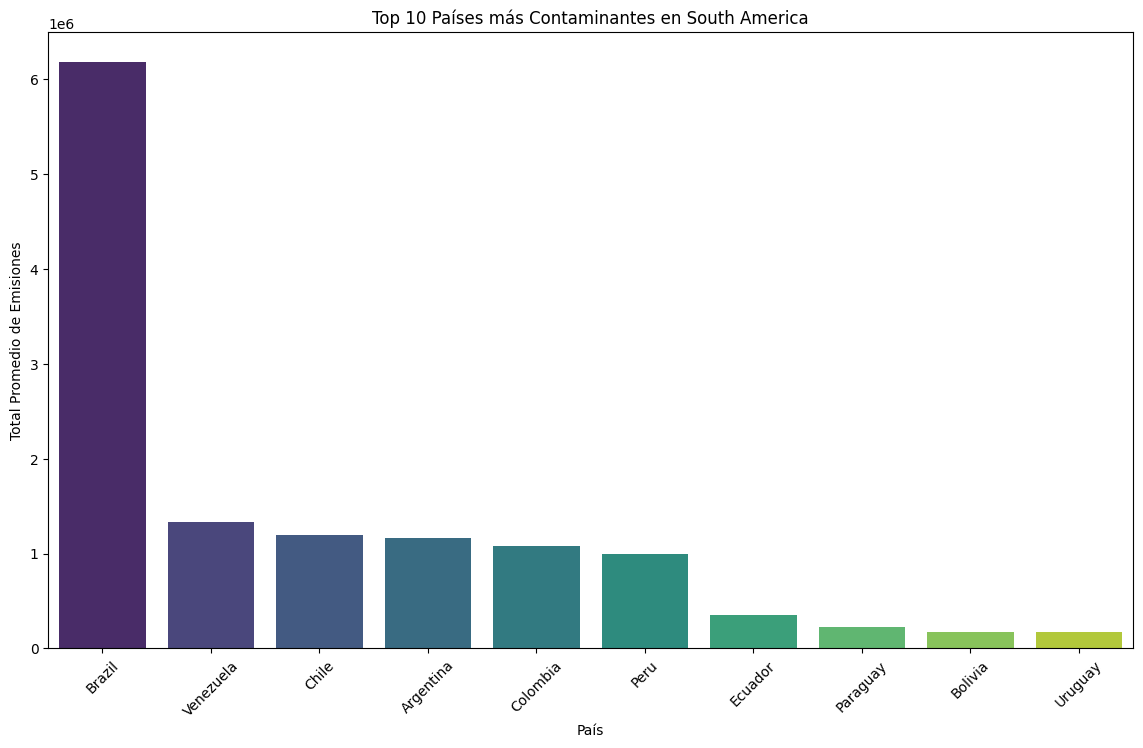

In [ ]:
promedio_emisiones_por_region = air.groupby(['Continent', 'Entity'])[contaminantes].mean().reset_index()
promedio_emisiones_por_region['Total_Emisiones'] = promedio_emisiones_por_region[contaminantes].sum(axis=1)
continentes = promedio_emisiones_por_region['Continent'].unique()
for continente in continentes:
    top_10_paises_region = promedio_emisiones_por_region[promedio_emisiones_por_region['Continent'] == continente].nlargest(10, 'Total_Emisiones')
    plt.figure(figsize=(14, 8))
    sns.barplot(data=top_10_paises_region, x='Entity', y='Total_Emisiones', palette='viridis')
    plt.title(f'Top 10 Países más Contaminantes en {continente}')
    plt.xlabel('País')
    plt.ylabel('Total Promedio de Emisiones')
    plt.xticks(rotation=45)
    plt.show()

#### Gráficas del comportamiento de las emisiones de contaminantes en las diferentes regiones.

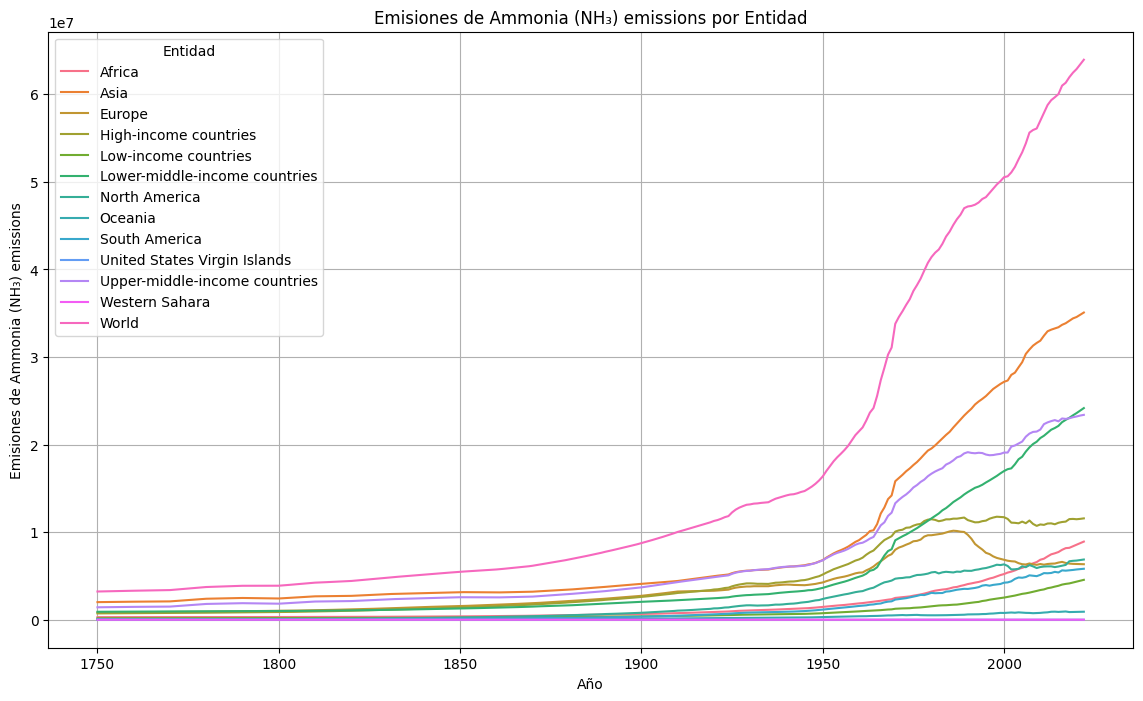

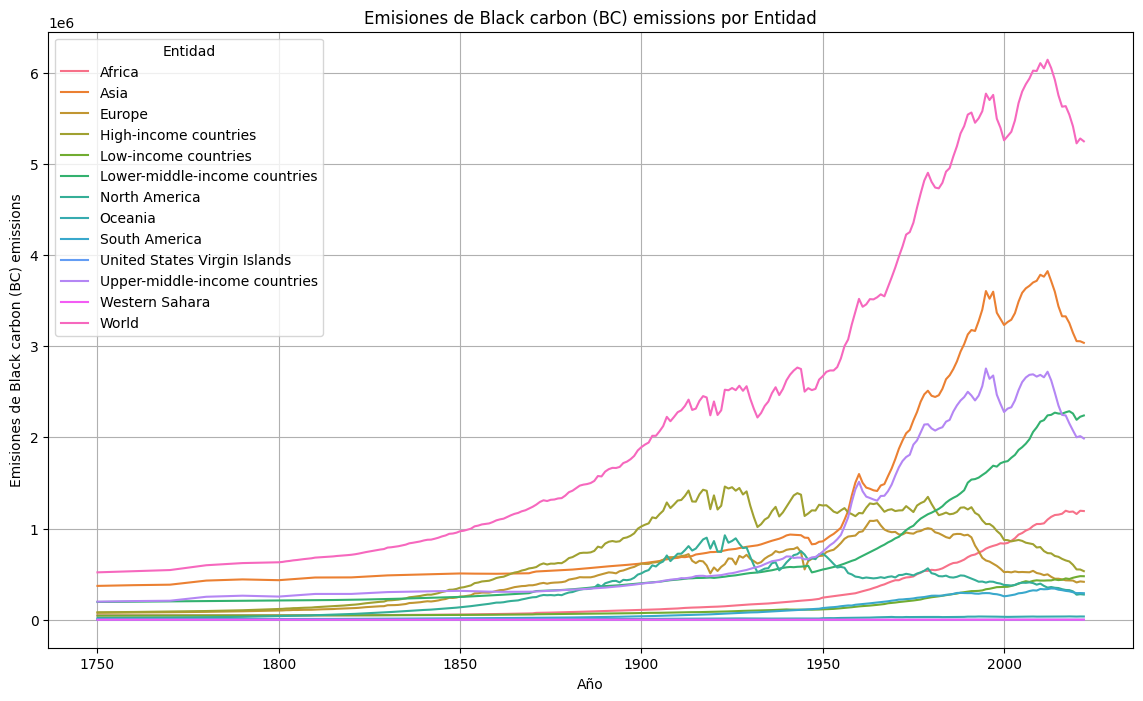

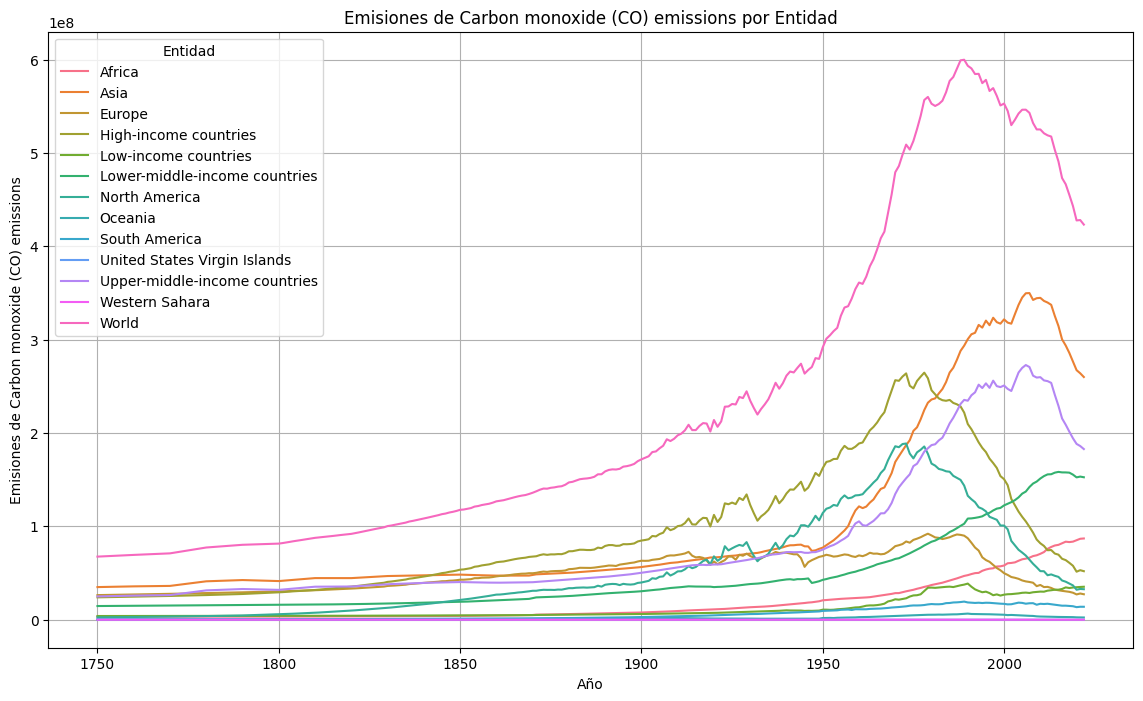

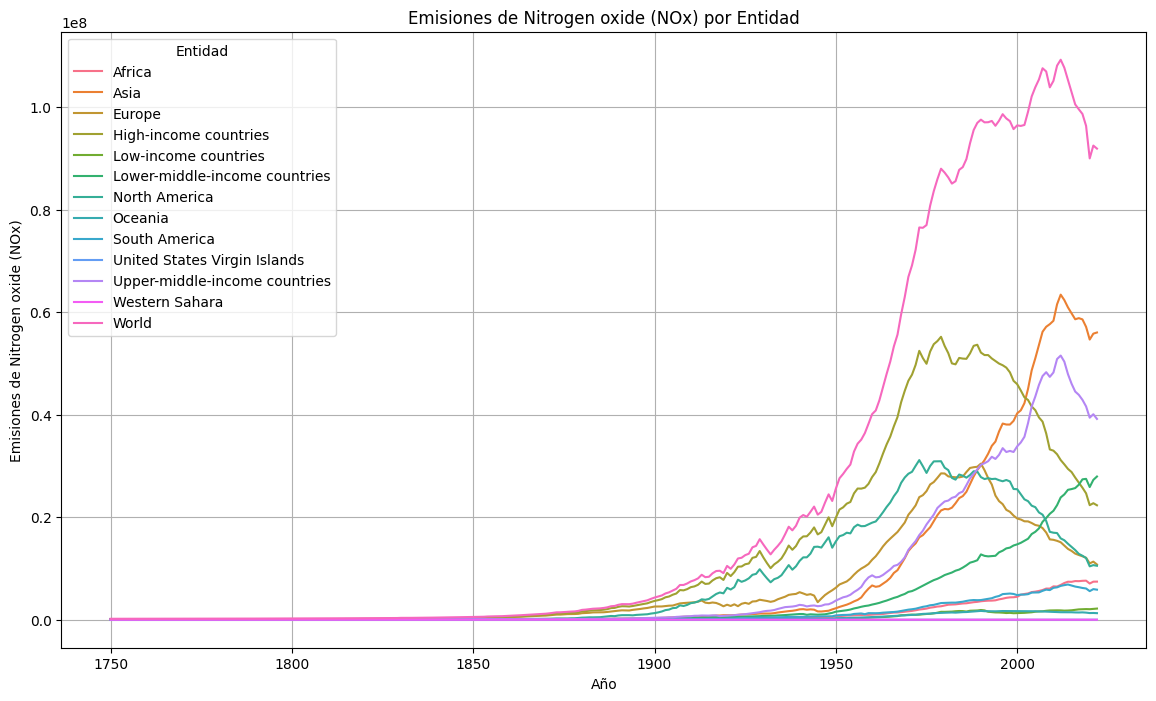

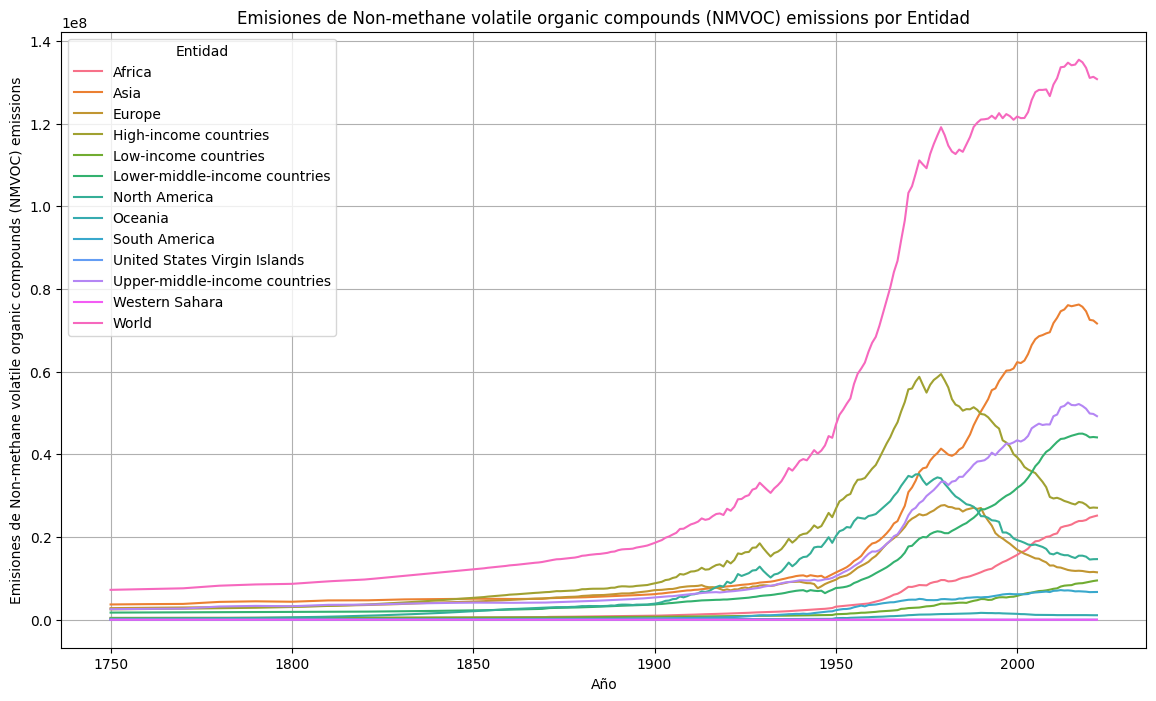

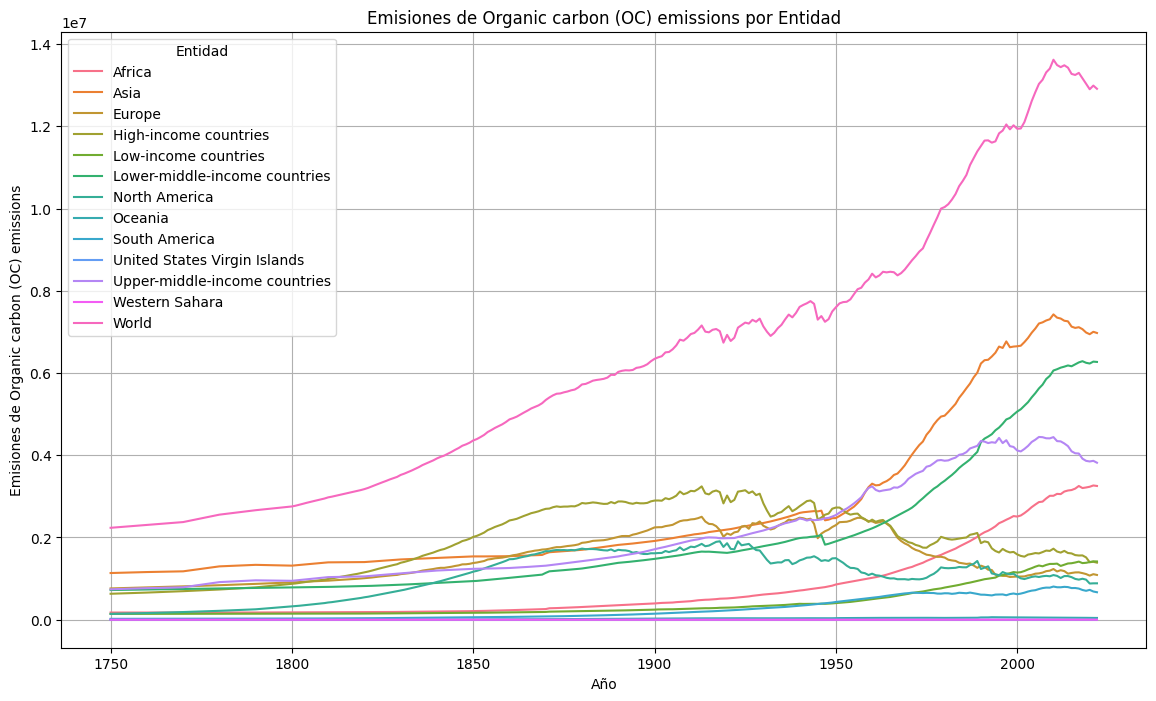

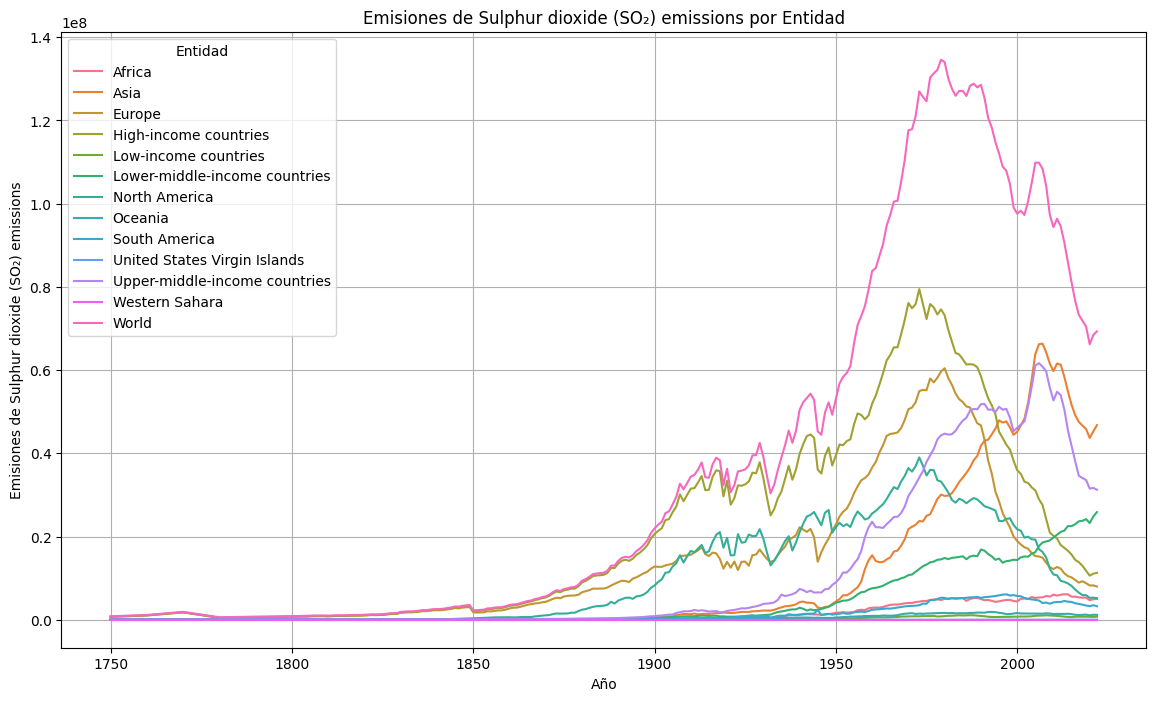

In [ ]:
suma_contaminantes_por_entidad_año = df_entidades.groupby(['Entity', 'Year'])[contaminantes].sum().reset_index()
for contaminante in contaminantes:
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=suma_contaminantes_por_entidad_año, x='Year', y=contaminante, hue='Entity')
    plt.title(f'Emisiones de {contaminante} por Entidad')
    plt.xlabel('Año')
    plt.ylabel(f'Emisiones de {contaminante}')
    plt.legend(title='Entidad')
    plt.grid(True)
    plt.show()

#### Gráfica region del mundo mas contaminante

In [38]:
df_entidades = df_entidades[df_entidades['Entity'] != 'World']

contaminantes = df_entidades.columns[2:]

promedio_contaminantes_por_entidad_año = df_entidades.groupby(['Entity', 'Year'])[contaminantes].mean().reset_index()

promedio_contaminantes_por_entidad_año['Promedio_Contaminantes'] = promedio_contaminantes_por_entidad_año[contaminantes].mean(axis=1)

In [39]:
promedio_contaminantes_por_entidad_año.head()

,Entity,Year,Nitrogen oxide (NOx),Sulphur dioxide (SO₂) emissions,Carbon monoxide (CO) emissions,Organic carbon (OC) emissions,Non-methane volatile organic compounds (NMVOC) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions,Promedio_Contaminantes
0,Africa,1750,17671.812,7693.8726,3283140.0,174831.50,420443.03,47376.312,294775.34,606561.695229
1,Africa,1760,17750.662,7700.5747,3288960.8,175004.75,420842.38,47419.586,295370.38,607578.447529
2,Africa,1770,17836.184,7709.6570,3295845.2,175232.31,421382.25,47477.630,296091.75,608796.425857
3,Africa,1780,17928.623,7721.0396,3303775.8,175512.27,422058.16,47549.906,296939.34,610212.162657
4,Africa,1790,18028.533,7734.8390,3312819.8,175845.30,422879.56,47636.790,297921.56,611838.054571


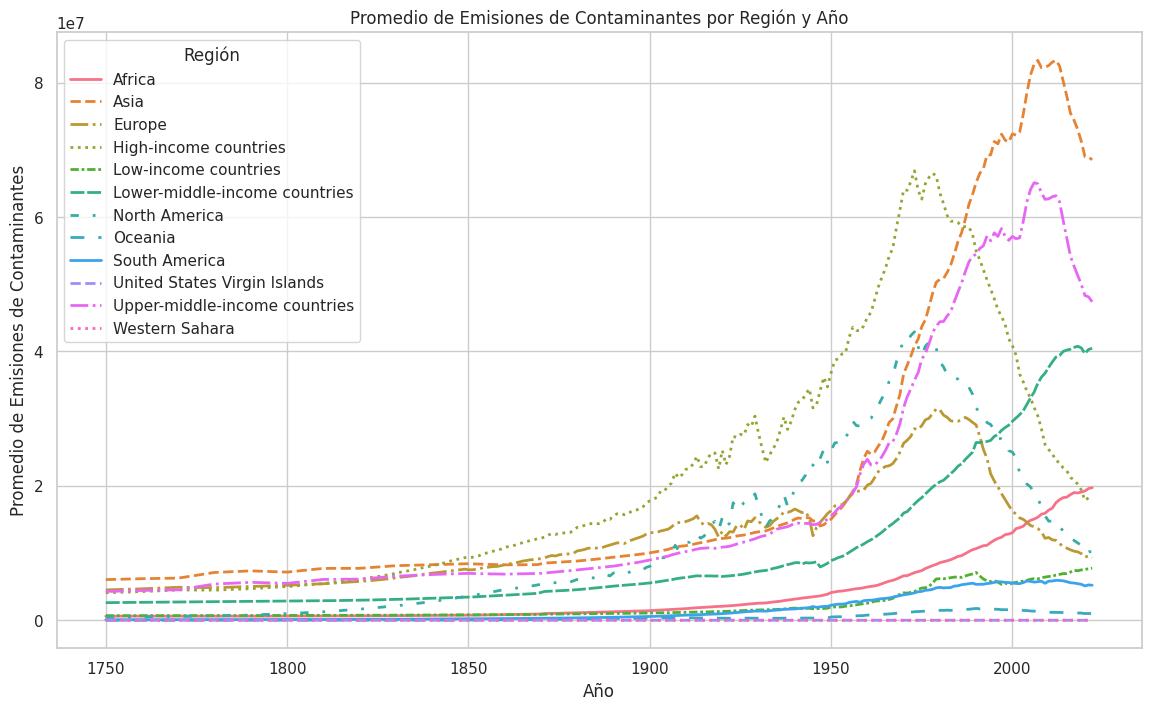

In [40]:
sns.set(style="whitegrid")
palette = sns.color_palette("husl", len(promedio_contaminantes_por_entidad_año['Entity'].unique()))
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 1)), (0, (3, 5, 1, 5)), (0, (5, 5))]

plt.figure(figsize=(14, 8))

for i, (region, data) in enumerate(promedio_contaminantes_por_entidad_año.groupby('Entity')):
    sns.lineplot(data=data, x='Year', y='Promedio_Contaminantes', label=region,
                 color=palette[i % len(palette)], linestyle=linestyles[i % len(linestyles)], linewidth=2)

plt.title('Promedio de Emisiones de Contaminantes por Región y Año')
plt.xlabel('Año')
plt.ylabel('Promedio de Emisiones de Contaminantes')
plt.legend(title='Región')
plt.grid(True)
plt.show()